In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import seaborn as sns

### Indexing lists and matrices

In [2]:
# creating a matrix
nums = np.random.randint(1,100,100).reshape(10,10)

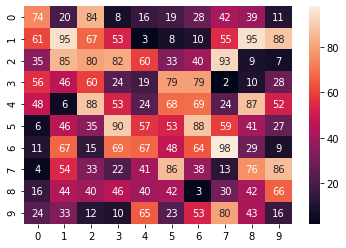

In [186]:
%matplotlib inline
sns.heatmap(nums,annot=True)

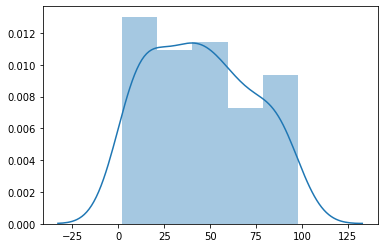

In [183]:
%matplotlib inline
sns.distplot(nums.ravel())

In [188]:
nums[0,0]

74

In [193]:
nums[:4,:4]

array([[74, 20, 84,  8],
       [61, 95, 67, 53],
       [35, 85, 80, 82],
       [56, 46, 60, 24]])

In [191]:
nums[5:7,5:7]

array([[53, 88],
       [48, 64]])

In [194]:
url_python = 'https://imgs.xkcd.com/comics/python.png'

In [273]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image, ImageFilter
import requests
from io import BytesIO

response = requests.get(url_python)
img = Image.open(BytesIO(response.content))

img.format

'PNG'

In [264]:
img.size

(518, 588)

In [265]:
img.mode

'L'

In [266]:
img.info

{'gamma': 0.45454,
 'chromaticity': (0.31269, 0.32899, 0.63999, 0.33001, 0.3, 0.6, 0.15, 0.05999),
 'dpi': (72, 72)}

In [283]:
img.getbbox()

(0, 0, 518, 588)

In [288]:
other = np.array(img)

In [289]:
other[290:430,:160].shape

(140, 160)

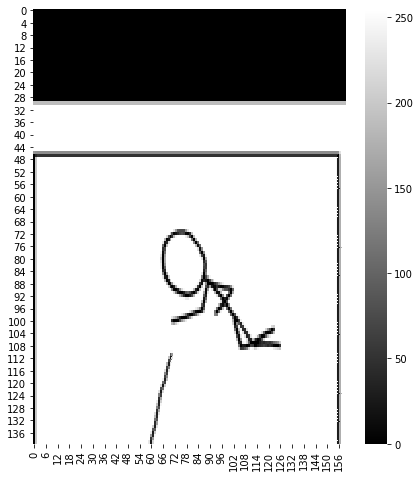

In [291]:
plt.figure(figsize=(7,8))




plot = sns.heatmap(other[290:430,:160], cmap= 'gist_gray')


In [274]:
blurred = img.filter(ImageFilter.BLUR)

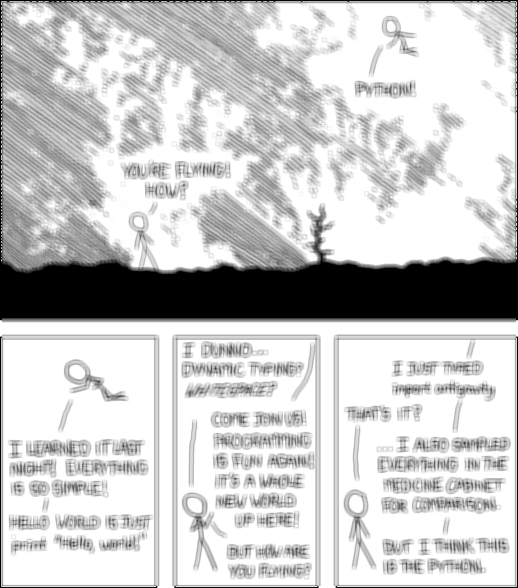

In [275]:
blurred

In [277]:
df = pd.read_csv('/Users/alistairwalsh/Downloads/Autism Q automate (Responses) - Form responses 1.csv')

In [278]:
df.columns

Index(['Timestamp', 'Email address',
       ' I prefer to do things with others rather than on my own.',
       ' I prefer to do things the same way over and over again.',
       ' If I try to imagine something, I find it very easy to create a picture in my mind.',
       ' I frequently get so strongly absorbed in one thing that I lose sight of other things.',
       ' I often notice small sounds when others do not.',
       ' I usually notice car number plates or similar strings of information.',
       ' Other people frequently tell me that what I've said is impolite, even though I think it is polite.',
       ' When I'm reading a story, I can easily imagine what the characters might look like.',
       ' I am fascinated by dates.',
       ' In a social group, I can easily keep track of several different people's conversations.',
       ' I find social situations easy.',
       ' I tend to notice details that others do not.',
       ' I would rather go to a library than to a party.',

In [280]:
df.drop(columns = 'Email address',inplace= True)

In [6]:
df.Timestamp = df.Timestamp.apply(pd.to_datetime)

In [281]:
ques_dict = {n:q for n,q in zip(range(1,len(df.columns[1:-4])+1),df.columns[1:-4])}

In [282]:
df.columns[:1]

Index(['Timestamp'], dtype='object')

In [9]:
df.columns[-4:]

Index(['Age', 'Sex',
       'Which of the following best describes your current occupation?',
       'How many years of education have you done?'],
      dtype='object')

In [10]:
df.columns = df.columns[:2].tolist() + [i for i in ques_dict.keys()] + df.columns[-4:].tolist()

In [11]:
df.columns

Index([                                                     'Timestamp',
                                                        'Email address',
                                                                      1,
                                                                      2,
                                                                      3,
                                                                      4,
                                                                      5,
                                                                      6,
                                                                      7,
                                                                      8,
                                                                      9,
                                                                     10,
                                                                     11,
                                                   

In [ ]:
areas = {'social skill':[1,11,13,15,22,36,44,45,47,48],
'attention switching':[2,4,10,16,25,32,34,37,43,46],
'attention to detail': [5,6,9,12,19,23,28,29,30,49],
'communication':[7,17,18,26,27,31,33,35,38,39],
'imagination':[3,8,14,20,21,24,40,41,42,50]}

In [46]:
#Scoring the AQ
“Definitely agree” or “slightly agree” responses
scored 1 point, on the following items: 
'agree':[1, 2, 4, 5, 6, 7,9, 12, 13, 16, 18, 19, 20, 21, 22, 23, 26, 33, 35, 39, 41, 42, 43, 45, 46] 

“Definitely disagree” or “slightly disagree” responses scored 1 point, on the following items:
'disagree':[3, 8, 10, 11, 14, 15, 17, 24, 25, 27, 28, 29, 30, 31, 32, 34, 36, 37, 38, 40, 44, 47, 48, 49, 50]

In [47]:
scoring = {'agree':[1, 2, 4, 5, 6, 7,9, 12, 13, 16, 18, 19, 20, 21, 22, 23, 26, 33, 35, 39, 41, 42, 43, 45, 46], 
'disagree':[3, 8, 10, 11, 14, 15, 17, 24, 25, 27, 28, 29, 30, 31, 32, 34, 36, 37, 38, 40, 44, 47, 48, 49, 50]}

In [48]:
scoring

{'agree': [1,
  2,
  4,
  5,
  6,
  7,
  9,
  12,
  13,
  16,
  18,
  19,
  20,
  21,
  22,
  23,
  26,
  33,
  35,
  39,
  41,
  42,
  43,
  45,
  46],
 'disagree': [3,
  8,
  10,
  11,
  14,
  15,
  17,
  24,
  25,
  27,
  28,
  29,
  30,
  31,
  32,
  34,
  36,
  37,
  38,
  40,
  44,
  47,
  48,
  49,
  50]}

In [64]:
mymap = {'Slightly agree':1,
        'Definitely agree':1,
        'Definitely disagree':0,
        'Slightly disagree':0}

In [66]:
df[scoring['agree']] = df[scoring['agree']].applymap(lambda s: mymap.get(s) if s in mymap else s)

In [177]:
{k: v + 1 if v == 0 else 0 for k,v in mymap.items()}

{'Slightly agree': 0,
 'Definitely agree': 0,
 'Definitely disagree': 1,
 'Slightly disagree': 1}

In [69]:
mymap2 = {k: v + 1 if v == 0 else 0 for k,v in mymap.items()}

In [71]:
df[scoring['disagree']] = df[scoring['disagree']].applymap(lambda s: mymap2.get(s) if s in mymap else s)

In [72]:
df[]

,Timestamp,Email address,1,2,3,4,5,6,7,8,...,45,46,47,48,49,50,Age,Sex,Which of the following best describes your current occupation?,How many years of education have you done?
0,2018-06-28 16:01:54,benmslade@gmail.com,1,1,1,1,1,1,0,0,...,1,1,1,1,1,1,33,Male,"Life, Physical, and Social Science Occupations",completed Honours or Masters degree
1,2019-05-25 15:57:23,mlbramhall@gmail.com,1,1,0,1,1,1,0,0,...,0,1,0,0,1,0,37,Male,"Life, Physical, and Social Science Occupations",completed PhD
2,2019-05-25 15:58:12,twhaites@buenosystems.com.au,0,1,0,1,0,1,0,0,...,0,1,0,0,0,0,35,Male,Architecture and Engineering Occupations,completed trade qualification
3,2019-05-25 15:58:37,rmutch@buenosystems.com.au,0,0,0,0,1,0,0,0,...,0,1,0,1,0,0,36,Male,Architecture and Engineering Occupations,completed Undergraduate degree
4,2019-05-25 15:59:26,pootanerd@yahoo.com.au,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,39,Male,Business and Financial Operations Occupations,completed Undergraduate degree
5,2019-05-25 15:59:40,pak272@gmail.com,1,1,0,0,0,0,0,0,...,1,0,0,0,1,0,36,Male,Management Occupations,completed Undergraduate degree
6,2019-05-25 15:59:43,sally.lyall77@gmail.com,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,42,Female,Architecture and Engineering Occupations,completed Honours or Masters degree
7,2019-05-25 16:00:00,lakhmichael@gmail.com,1,1,0,1,1,1,0,0,...,0,1,0,0,0,0,30,Male,Architecture and Engineering Occupations,completed Honours or Masters degree
8,2019-05-25 16:00:05,jean.f.aicardi@gmail.com,1,1,0,1,1,0,1,0,...,1,1,1,1,0,0,35,Male,Food Preparation and Serving Related Occupations,completed Undergraduate degree
9,2019-05-25 16:02:30,elkelhansen@gmail.com,1,1,1,1,0,1,1,1,...,1,1,0,1,1,1,31,Female,Business and Financial Operations Occupations,completed year 12


In [296]:
new_cat = pd.Categorical(df['Which of the following best describes your current occupation?'])

In [300]:
new_cat.categories

Index(['Architecture and Engineering Occupations',
       'Business and Financial Operations Occupations',
       'Food Preparation and Serving Related Occupations',
       'Life, Physical, and Social Science Occupations',
       'Management Occupations'],
      dtype='object')

In [82]:
df['total_score'] = df[[i for i in ques_dict.keys()]].sum(axis = 'columns')

In [311]:
pd.get_dummies(df['Which of the following best describes your current occupation?'])

,Architecture and Engineering Occupations,Business and Financial Operations Occupations,Food Preparation and Serving Related Occupations,"Life, Physical, and Social Science Occupations",Management Occupations
0,0,0,0,1,0
1,0,0,0,1,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0
5,0,0,0,0,1
6,1,0,0,0,0
7,1,0,0,0,0
8,0,0,1,0,0
9,0,1,0,0,0


In [83]:
df

,Timestamp,Email address,1,2,3,4,5,6,7,8,...,46,47,48,49,50,Age,Sex,Which of the following best describes your current occupation?,How many years of education have you done?,total_score
0,2018-06-28 16:01:54,benmslade@gmail.com,1,1,1,1,1,1,0,0,...,1,1,1,1,1,33,Male,"Life, Physical, and Social Science Occupations",completed Honours or Masters degree,41
1,2019-05-25 15:57:23,mlbramhall@gmail.com,1,1,0,1,1,1,0,0,...,1,0,0,1,0,37,Male,"Life, Physical, and Social Science Occupations",completed PhD,23
2,2019-05-25 15:58:12,twhaites@buenosystems.com.au,0,1,0,1,0,1,0,0,...,1,0,0,0,0,35,Male,Architecture and Engineering Occupations,completed trade qualification,16
3,2019-05-25 15:58:37,rmutch@buenosystems.com.au,0,0,0,0,1,0,0,0,...,1,0,1,0,0,36,Male,Architecture and Engineering Occupations,completed Undergraduate degree,10
4,2019-05-25 15:59:26,pootanerd@yahoo.com.au,0,0,0,1,0,0,0,0,...,1,0,0,0,1,39,Male,Business and Financial Operations Occupations,completed Undergraduate degree,12
5,2019-05-25 15:59:40,pak272@gmail.com,1,1,0,0,0,0,0,0,...,0,0,0,1,0,36,Male,Management Occupations,completed Undergraduate degree,9
6,2019-05-25 15:59:43,sally.lyall77@gmail.com,1,0,0,0,1,0,0,0,...,1,0,0,0,0,42,Female,Architecture and Engineering Occupations,completed Honours or Masters degree,8
7,2019-05-25 16:00:00,lakhmichael@gmail.com,1,1,0,1,1,1,0,0,...,1,0,0,0,0,30,Male,Architecture and Engineering Occupations,completed Honours or Masters degree,18
8,2019-05-25 16:00:05,jean.f.aicardi@gmail.com,1,1,0,1,1,0,1,0,...,1,1,1,0,0,35,Male,Food Preparation and Serving Related Occupations,completed Undergraduate degree,31
9,2019-05-25 16:02:30,elkelhansen@gmail.com,1,1,1,1,0,1,1,1,...,1,0,1,1,1,31,Female,Business and Financial Operations Occupations,completed year 12,35


In [88]:
for k,v in areas.items():
    df[k] = df[v].sum(axis = 'columns')

In [89]:
df

,Timestamp,Email address,1,2,3,4,5,6,7,8,...,Age,Sex,Which of the following best describes your current occupation?,How many years of education have you done?,total_score,social skill,attention switching,attention to detail,communication,imagination
0,2018-06-28 16:01:54,benmslade@gmail.com,1,1,1,1,1,1,0,0,...,33,Male,"Life, Physical, and Social Science Occupations",completed Honours or Masters degree,41,10,9,10,5,7
1,2019-05-25 15:57:23,mlbramhall@gmail.com,1,1,0,1,1,1,0,0,...,37,Male,"Life, Physical, and Social Science Occupations",completed PhD,23,4,5,8,4,2
2,2019-05-25 15:58:12,twhaites@buenosystems.com.au,0,1,0,1,0,1,0,0,...,35,Male,Architecture and Engineering Occupations,completed trade qualification,16,1,5,5,3,2
3,2019-05-25 15:58:37,rmutch@buenosystems.com.au,0,0,0,0,1,0,0,0,...,36,Male,Architecture and Engineering Occupations,completed Undergraduate degree,10,2,3,4,1,0
4,2019-05-25 15:59:26,pootanerd@yahoo.com.au,0,0,0,1,0,0,0,0,...,39,Male,Business and Financial Operations Occupations,completed Undergraduate degree,12,2,4,1,1,4
5,2019-05-25 15:59:40,pak272@gmail.com,1,1,0,0,0,0,0,0,...,36,Male,Management Occupations,completed Undergraduate degree,9,2,2,4,0,1
6,2019-05-25 15:59:43,sally.lyall77@gmail.com,1,0,0,0,1,0,0,0,...,42,Female,Architecture and Engineering Occupations,completed Honours or Masters degree,8,1,1,5,1,0
7,2019-05-25 16:00:00,lakhmichael@gmail.com,1,1,0,1,1,1,0,0,...,30,Male,Architecture and Engineering Occupations,completed Honours or Masters degree,18,1,5,8,3,1
8,2019-05-25 16:00:05,jean.f.aicardi@gmail.com,1,1,0,1,1,0,1,0,...,35,Male,Food Preparation and Serving Related Occupations,completed Undergraduate degree,31,8,10,5,4,4
9,2019-05-25 16:02:30,elkelhansen@gmail.com,1,1,1,1,0,1,1,1,...,31,Female,Business and Financial Operations Occupations,completed year 12,35,6,7,8,8,6


In [92]:
df[['Which of the following best describes your current occupation?',
   'How many years of education have you done?',
   'total_score']]

,Which of the following best describes your current occupation?,How many years of education have you done?,total_score
0,"Life, Physical, and Social Science Occupations",completed Honours or Masters degree,41
1,"Life, Physical, and Social Science Occupations",completed PhD,23
2,Architecture and Engineering Occupations,completed trade qualification,16
3,Architecture and Engineering Occupations,completed Undergraduate degree,10
4,Business and Financial Operations Occupations,completed Undergraduate degree,12
5,Management Occupations,completed Undergraduate degree,9
6,Architecture and Engineering Occupations,completed Honours or Masters degree,8
7,Architecture and Engineering Occupations,completed Honours or Masters degree,18
8,Food Preparation and Serving Related Occupations,completed Undergraduate degree,31
9,Business and Financial Operations Occupations,completed year 12,35


<IPython.core.display.Javascript object>


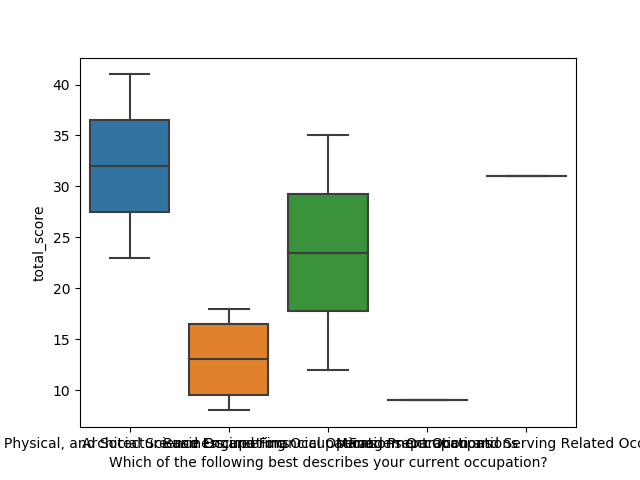

In [105]:
%matplotlib notebook
sns.boxplot(x = df['Which of the following best describes your current occupation?'],y = df['total_score'])

In [106]:
df = sns.load_dataset('iris')

<IPython.core.display.Javascript object>


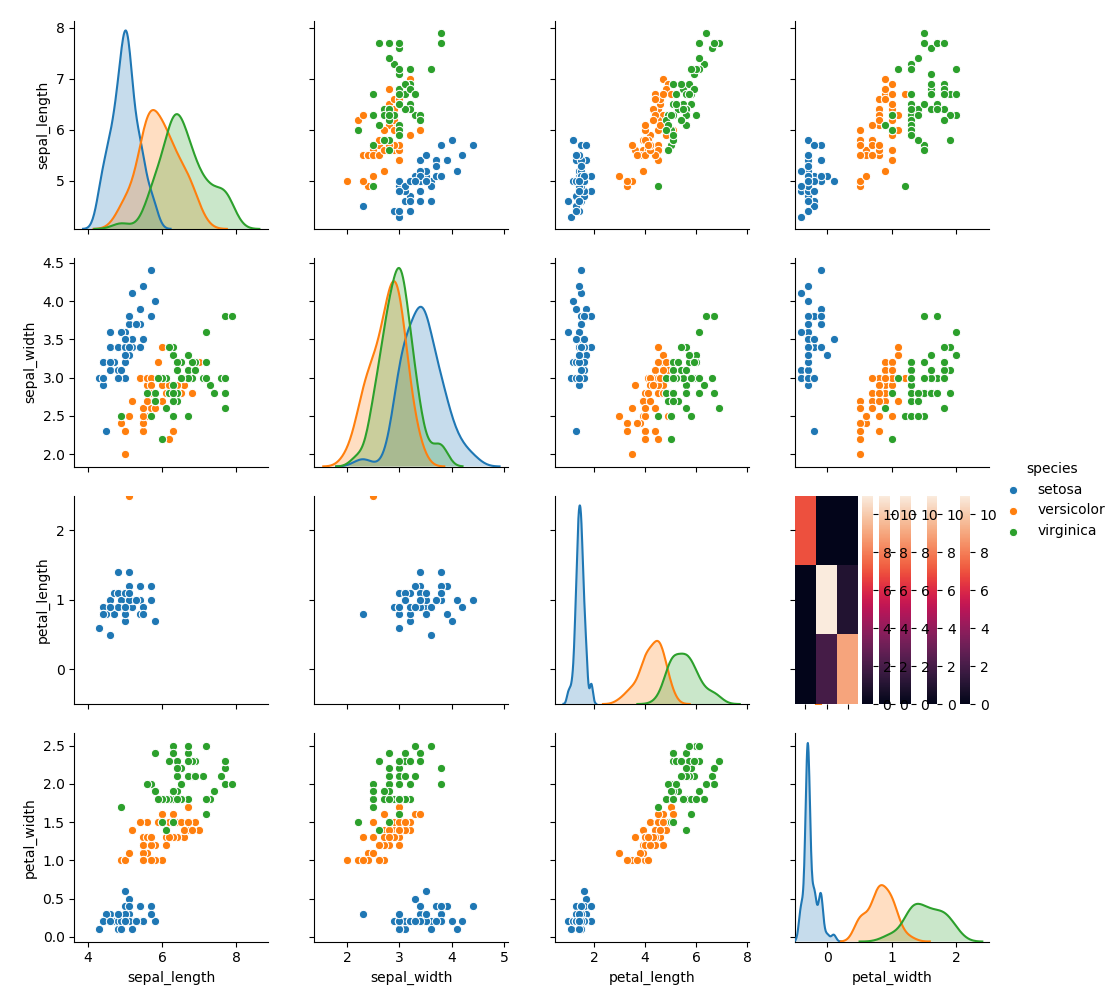

In [109]:
sns.pairplot(df,hue = 'species')

In [ ]:
#https://www.kaggle.com/cornhedgehog/iris-example

In [116]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [126]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [156]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,
                                                                    y, 
                                                                    test_size=0.20, 
                                                                    random_state=7)

In [157]:
for s in [X_train, X_test, y_train, y_test]:
    print(s.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [158]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver = 'lbfgs',multi_class = 'auto',max_iter = 200)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma = 'scale')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=7)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = f"{name}\t {round(cv_results.mean(),3)} {round(cv_results.std(),3)}"
    print(msg)

LR	 0.983 0.033
LDA	 0.975 0.038
KNN	 0.983 0.033
CART	 0.975 0.038
NB	 0.975 0.053
SVM	 0.983 0.033


In [159]:
names

['LR', 'LDA', 'KNN', 'CART', 'NB', 'SVM']

In [160]:
results = pd.DataFrame(results).T

In [161]:
results.columns = names

In [162]:
results

,LR,LDA,KNN,CART,NB,SVM
0,1.000000,1.000000,1.000000,0.916667,1.000000,0.916667
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,1.000000,0.916667,1.000000,1.000000,0.916667,1.000000
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
6,0.916667,0.916667,0.916667,0.916667,1.000000,0.916667
7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
8,0.916667,0.916667,1.000000,0.916667,0.833333,1.000000
9,1.000000,1.000000,0.916667,1.000000,1.000000,1.000000


In [173]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

0.9
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         7
  versicolor       0.85      0.92      0.88        12
   virginica       0.90      0.82      0.86        11

    accuracy                           0.90        30
   macro avg       0.92      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30



<IPython.core.display.Javascript object>


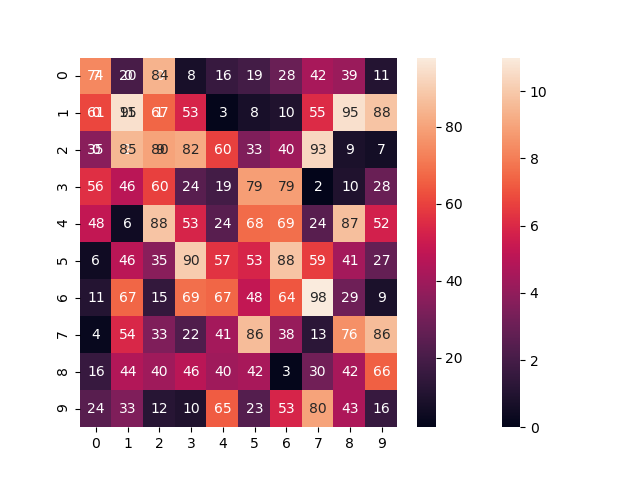

In [174]:
# Make predictions on validation dataset
%matplotlib notebook
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
print(accuracy_score(y_test, predictions))

print(classification_report(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
index = ['setosa', 'versicolor', 'virginica']  
columns = ['setosa', 'versicolor', 'virginica']  

sns.heatmap(pd.DataFrame(cm,index,columns),annot=True)

https://stackabuse.com/python-for-nlp-tokenization-stemming-and-lemmatization-with-spacy-library/

https://adventuresinmachinelearning.com/word2vec-keras-tutorial/

In [ ]:
df.replace(to_replace=['set', 'test'], value=[1, 2])